In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from classes import moment_analytic
from classes import classifier
import seaborn as sns



import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"
rcParams['font.family'] = 'serif'
rcParams['mathtext.default'] = 'regular'
rcParams['figure.figsize'] = (20,15)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 20
rcParams['axes.labelsize'] = 40
rcParams['axes.titlesize'] = 50 #title
rcParams['axes.linewidth'] = 1
rcParams['legend.fontsize'] = 30 #legend
rcParams['xtick.labelsize'] = 30
rcParams['ytick.labelsize'] = 30
rcParams['lines.linewidth'] = 2
rcParams['lines.markersize']=5
rcParams['lines.markeredgewidth']=4
rcParams['xtick.major.size'] = 20.0
rcParams['xtick.major.width'] = 2
rcParams['xtick.minor.size'] = 12.0
rcParams['xtick.minor.width'] = 1.5
rcParams['ytick.major.size'] = 20.0
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.size'] = 12.0
rcParams['ytick.minor.width'] = 1.5
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
rcParams["figure.facecolor"] = "w"
rcParams["figure.edgecolor"] = "w"
rcParams['mathtext.fontset'] = 'custom'

In [2]:
def read_file_FM_new(n, layers, method = 'FM'):
    problem_d = {'brick': 'Classifier_FM/RvsL_brick', 'non-brick': 'Classifier_FM/RvsL_non_brick' , 'dr': 'Classifier_circle/RvsL', 'drwoy': 'Classifier_circle/RvsL_woy'}
    epsilon = 0.07
    ts= [i for i in range(1,5)]
    n_train = 50
    if method == 'dr' or method =='drwoy': 
            file_M = f"data/{problem_d[method]}/Trained/MY_TRAIN_R_nqubits:{n}_t:{ts}-layers:{layers}-epsilon_{epsilon}_n_train:{n_train}.npz"
            file_error =  f"data/{problem_d[method]}/Trained/MY_TRAIN_Error_nqubits:{n}_t:{ts}-layers:{layers}-epsilon_{epsilon}_n_train:{n_train}.npz"
            file_M_rand = f"data/{problem_d[method]}/Random/MY_R_nqubits:{n}_t:{ts}-layers:{layers}-epsilon_{epsilon}_n_train:50.npz"
            file_error_rand =  f"data/{problem_d[method]}/Random/MY_Error_nqubits:{n}_t:{ts}-layers:{layers}-epsilon_{epsilon}_n_train:50.npz"
            file_M_test = f"data/{problem_d[method]}/Trained/MY_TEST_R_nqubits:{n}_t:{ts}-layers:{layers}-epsilon_{epsilon}_n_train:{n_train}.npz"
            file_error_test =  f"data/{problem_d[method]}/Trained/MY_TEST_Error_nqubits:{n}_t:{ts}-layers:{layers}-epsilon_{epsilon}_n_train:{n_train}.npz"
    else:
        file_M = f"data/{problem_d[method]}/Trained/MY_TRAIN_R_nqubits:{n}_t:{ts}-layers:{layers}-epsilon_{epsilon}.npz"
        file_error =  f"data/{problem_d[method]}/Trained/MY_TRAIN_Error_nqubits:{n}_t:{ts}-layers:{layers}-epsilon_{epsilon}.npz"
        file_M_rand = f"data/{problem_d[method]}/Random/MY_R_nqubits:{n}_t:{ts}-layers:{layers}-epsilon_{epsilon}.npz"
        file_error_rand =  f"data/{problem_d[method]}/Random/MY_Error_nqubits:{n}_t:{ts}-layers:{layers}-epsilon_{epsilon}.npz"
        file_M_test = f"data/{problem_d[method]}/Trained/MY_TEST_R_nqubits:{n}_t:{ts}-layers:{layers}-epsilon_{epsilon}_n_train:{n_train}.npz"
        file_error_test =  f"data/{problem_d[method]}/Trained/MY_TEST_Error_nqubits:{n}_t:{ts}-layers:{layers}-epsilon_{epsilon}_n_train:{n_train}.npz"
    M_t_train = np.load(file_M, allow_pickle= True)[np.load(file_M).files[0]].item()
    error_t_train = np.load(file_error, allow_pickle= True)[np.load(file_error).files[0]].item()
    M_t_test = np.load(file_M_test, allow_pickle= True)[np.load(file_M_test).files[0]].item()
    error_t_test = np.load(file_error_test, allow_pickle= True)[np.load(file_error_test).files[0]].item()
    M_t_random_fm= np.load(file_M_rand, allow_pickle= True)[np.load(file_M_rand).files[0]].item()
    error_t_random_fm= np.load(file_error_rand, allow_pickle= True)[np.load(file_error_rand).files[0]].item()
    return M_t_train, error_t_train, M_t_test, error_t_test,M_t_random_fm,error_t_random_fm

FileNotFoundError: [Errno 2] No such file or directory: 'data/Classifier_circle/RvsL/Trained/MY_TRAIN_R_nqubits:6_t:[1, 2, 3, 4]-layers:[2, 4, 6, 8, 10, 12]-epsilon_0.07_n_train:50.npz'

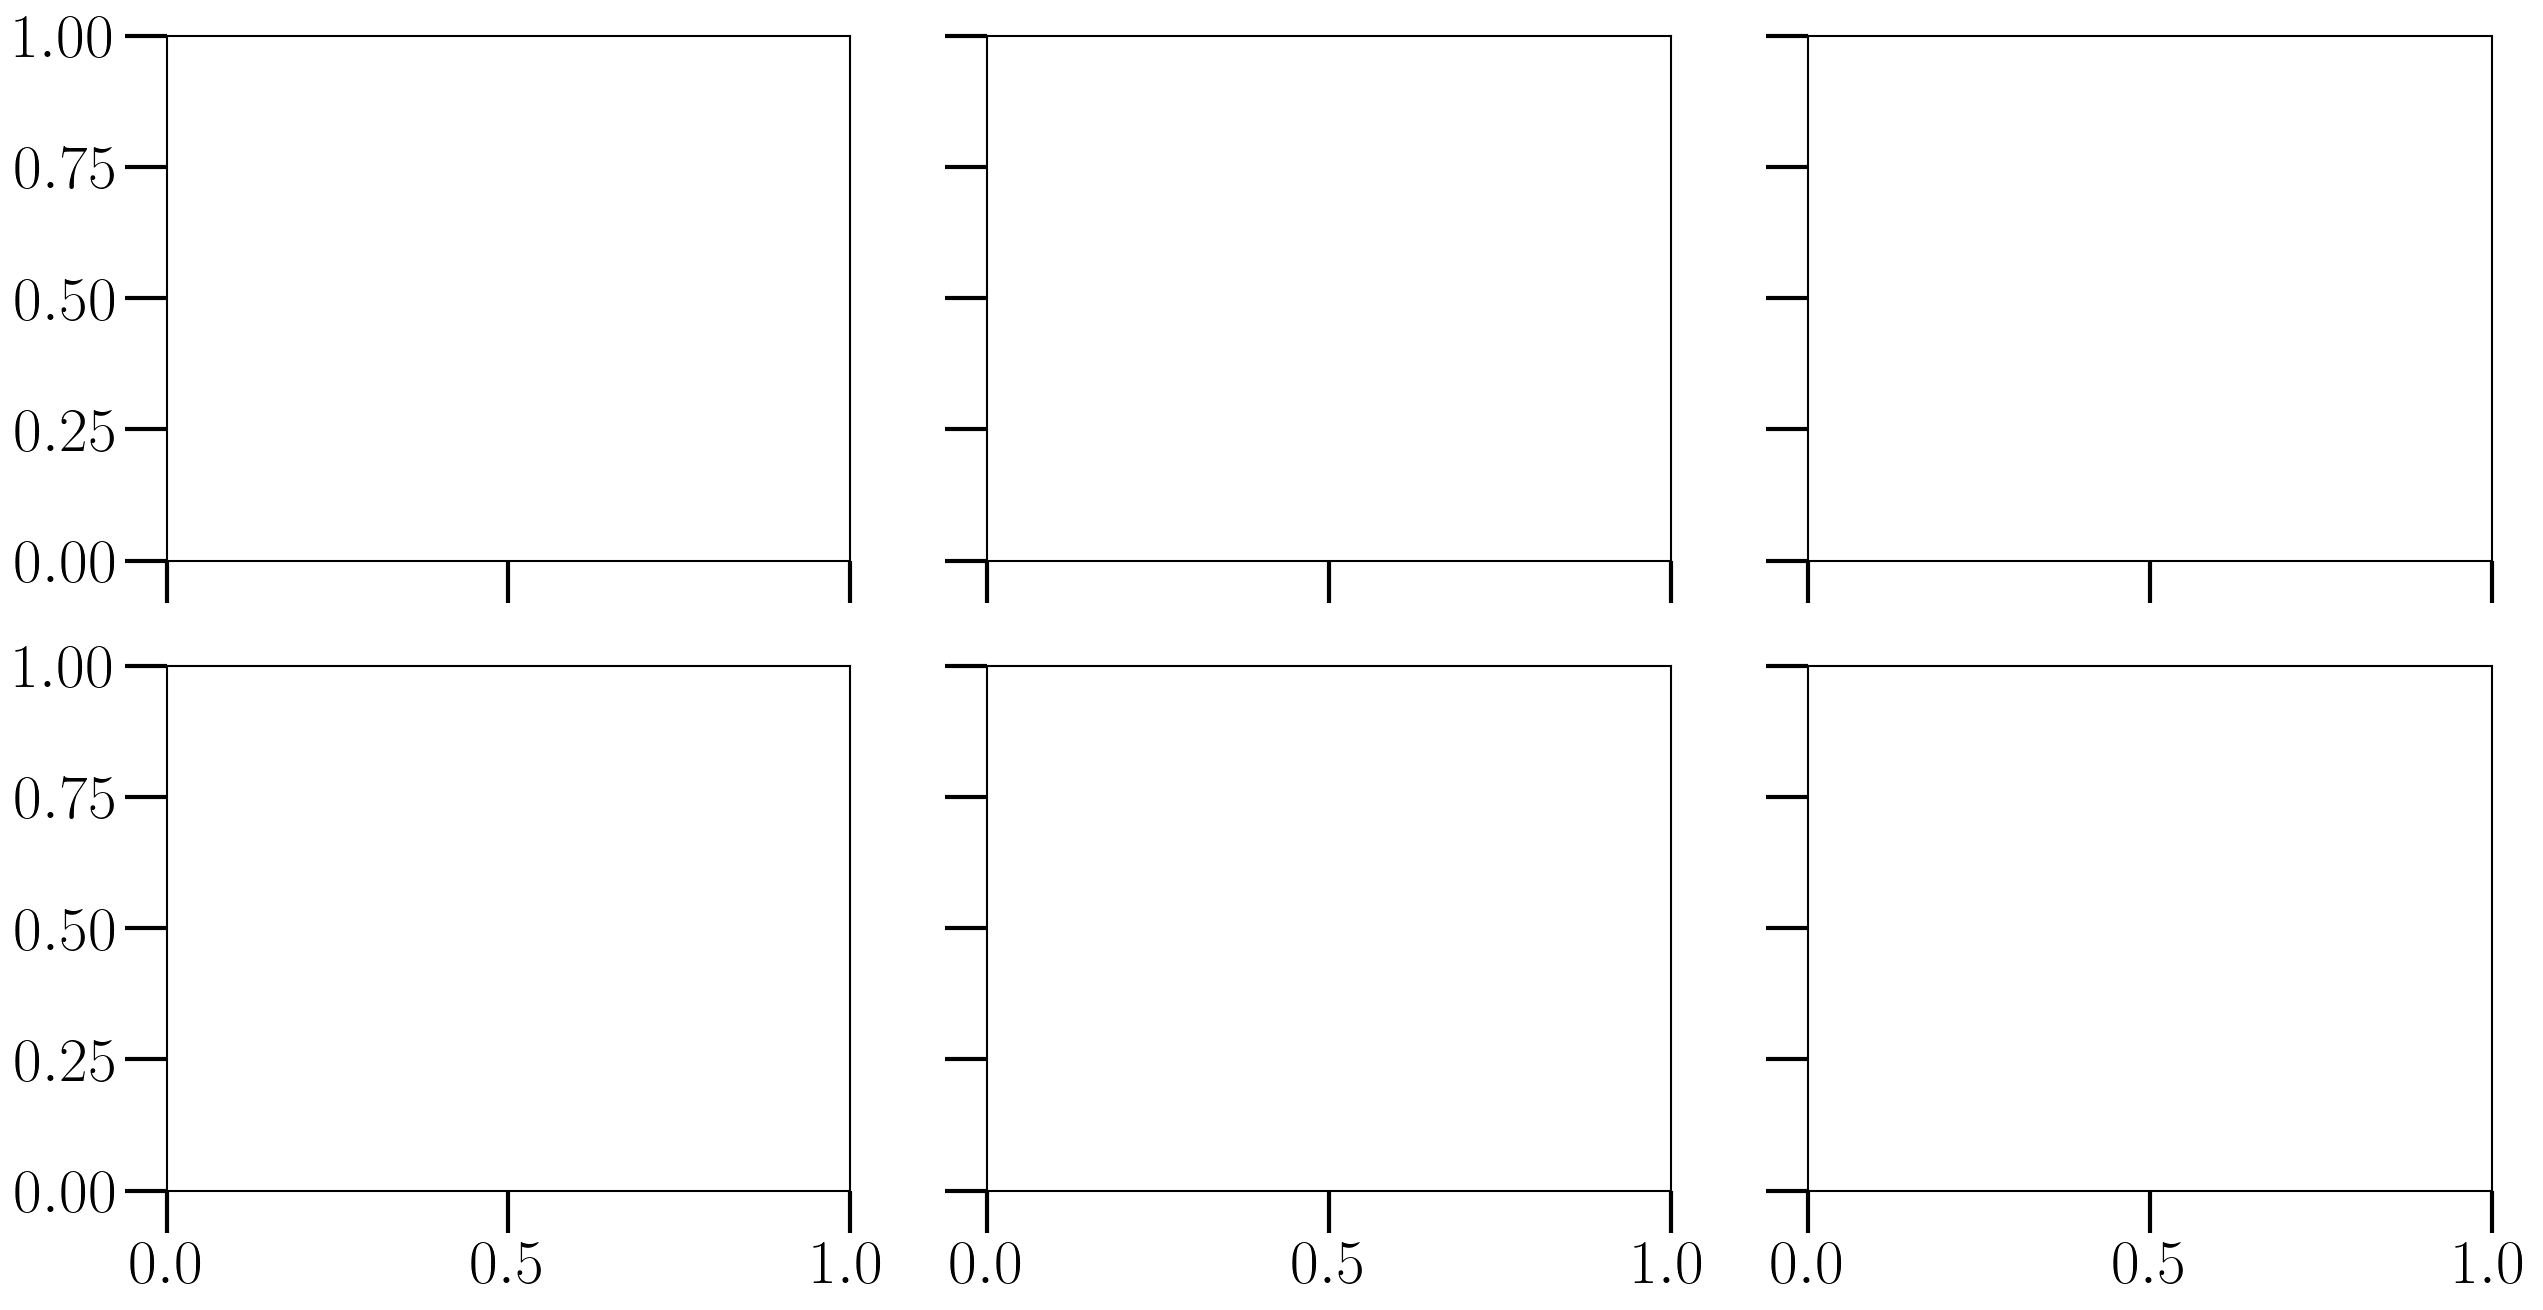

In [3]:
# DR
import seaborn as sns
am = moment_analytic() 
grey = '#424242'
clrs = sns.color_palette("husl", 3)
clrs = ['#8BA629','#829DD1', '#EBAE49', 'red']
rcParams['figure.figsize'] = (20,10)
prop_cycle = plt.rcParams['axes.prop_cycle']
cols = sns.color_palette("husl", 5)[2:]
clrs = sns.color_palette("husl", 5)
clrs =  ['#8DC43B',cols[-1],  cols[-2]]
markersize = 10
fig, ax = plt.subplots(nrows =2, ncols =3 , sharey= 'row', sharex= 'col')
ts = [1,2]
ns = [6,8,10]
layers = [2,4,6,8,10,12]
eigenvalues = [1, 0]

for j,n in enumerate(ns):
    eigenvalues = [1, 0]
    multiplicities = [2**(n-1), 2**(n-1)]
    moment_Haar = {t: am.compute_moments(eigenvalues,multiplicities, t) for t in ts}
    M_t_train, _, M_t_test, error_t_test,M_t_random,error_t_random = read_file_FM_new(n, layers, 'dr')
    M_t_train[1] = np.array(M_t_train[1])+moment_Haar[1]
    M_t_test[1] =  np.array(M_t_test[1])+ moment_Haar[1]
    M_t_random[1] = np.array(M_t_random[1])+ moment_Haar[1]
    
   
    Var_train = np.array(M_t_train[2])+moment_Haar[2]-np.array([i**2 for i in M_t_train[1]])
    Var_test = np.array(M_t_test[2])+moment_Haar[2]-np.array([i**2 for i in M_t_test[1]])
    E_test = np.array(error_t_test[2])- 2*np.array(M_t_test[1]) *np.array(error_t_test[1])
    Var_random =  np.array(M_t_random[2])+moment_Haar[2]-np.array([i**2 for i in M_t_random[1]])
    E_random = np.array(error_t_random[2])- 2*np.array(M_t_random[1])*np.array(error_t_random[1])


    ax[1][0].plot(layers, Var_train, marker='o', color = clrs[j], label = f'n = {n}, Train', lw = 3, markersize = markersize)
    ax[1][1].plot(layers, Var_test, marker =  'o', color = clrs[j], label = f'n = {n}, Test', lw = 3, markersize = markersize)
    ax[1][1].fill_between(layers, Var_test- E_test,Var_test+E_test, alpha = 0.3, facecolor=clrs[j] ) #, '*', ls= '--', color = clrs[j], label = f'Test. t = {t}', lw = 3)
    ax[1][2].plot(layers, Var_random, marker = 'o', color = clrs[j] ,label = f'n = {n}', lw = 3, markersize = markersize)
    ax[1][2].fill_between(layers, Var_random- E_random,Var_random+E_random, alpha = 0.3, facecolor=clrs[j] )
    t =1
    ax[0][0].plot(layers, 1/2- (1- np.array(M_t_train[t])), marker='o', color = clrs[j], label = f'n = {n}, Train', lw = 3, markersize = markersize)
    ax[0][1].plot(layers, 1/2-(1- np.array(M_t_test[t])), marker ='o', color = clrs[j] , label = f'n = {n}, Test', lw = 3, markersize = markersize)
    ax[0][1].fill_between(layers, 1/2-(1- np.array(M_t_test[t])- np.array(error_t_test[t])), 1/2- (1- np.array(M_t_test[t])+ np.array(error_t_test[t])), alpha = 0.3, facecolor=clrs[j] ) #, '*', ls= 
    ax[0][2].errorbar(layers, 1/2- (1- np.array(M_t_random[t])),  marker = 'o', color = clrs[j] ,label = f'n = {n}', lw = 3, markersize = markersize)
    ax[0][2].fill_between(layers, 1/2- (1- np.array(M_t_random[t])- np.array(error_t_random[t])),1/2-(1-  np.array(M_t_random[t])+ np.array(error_t_random[t])), alpha = 0.3, facecolor=clrs[j] )

for l in range(3): 
    ax[0][l].grid()
    ax[1][l].grid()

fs = 40
ax[0][2].legend()
ax[0][0].set_ylabel(r'$\frac 12- \mu_1^{(DR)} (z_{\boldsymbol{\theta}}(\boldsymbol{x})) $ ' , color = grey, fontsize = fs)
ax[1][0].set_ylabel(r'$\sigma^{2(DR)}[z_{\boldsymbol{\theta}}(\boldsymbol{x})]$ ' , color = grey, fontsize = fs)
ax[1][0].set_xlabel('L', color = grey, fontsize = fs )
ax[1][1].set_xlabel('L', color = grey, fontsize = fs )
ax[1][2].set_xlabel('L', color = grey, fontsize = fs )
ax[0][0].set_title('Train', color = grey, fontsize = fs )
ax[0][1].set_title('Test', color = grey, fontsize = fs )
ax[0][2].set_title('Random params', color = grey, fontsize = fs )
ax[0][0].set_yticks([-0.1, 0, 0.15, 0.3])
ax[1][0].set_yticks([-0.05, 0, 0.1])
plt.subplots_adjust(wspace=0.1, hspace=0.15)
plt.savefig(f'figs/Var_mu1_DR.pdf', bbox_inches='tight')

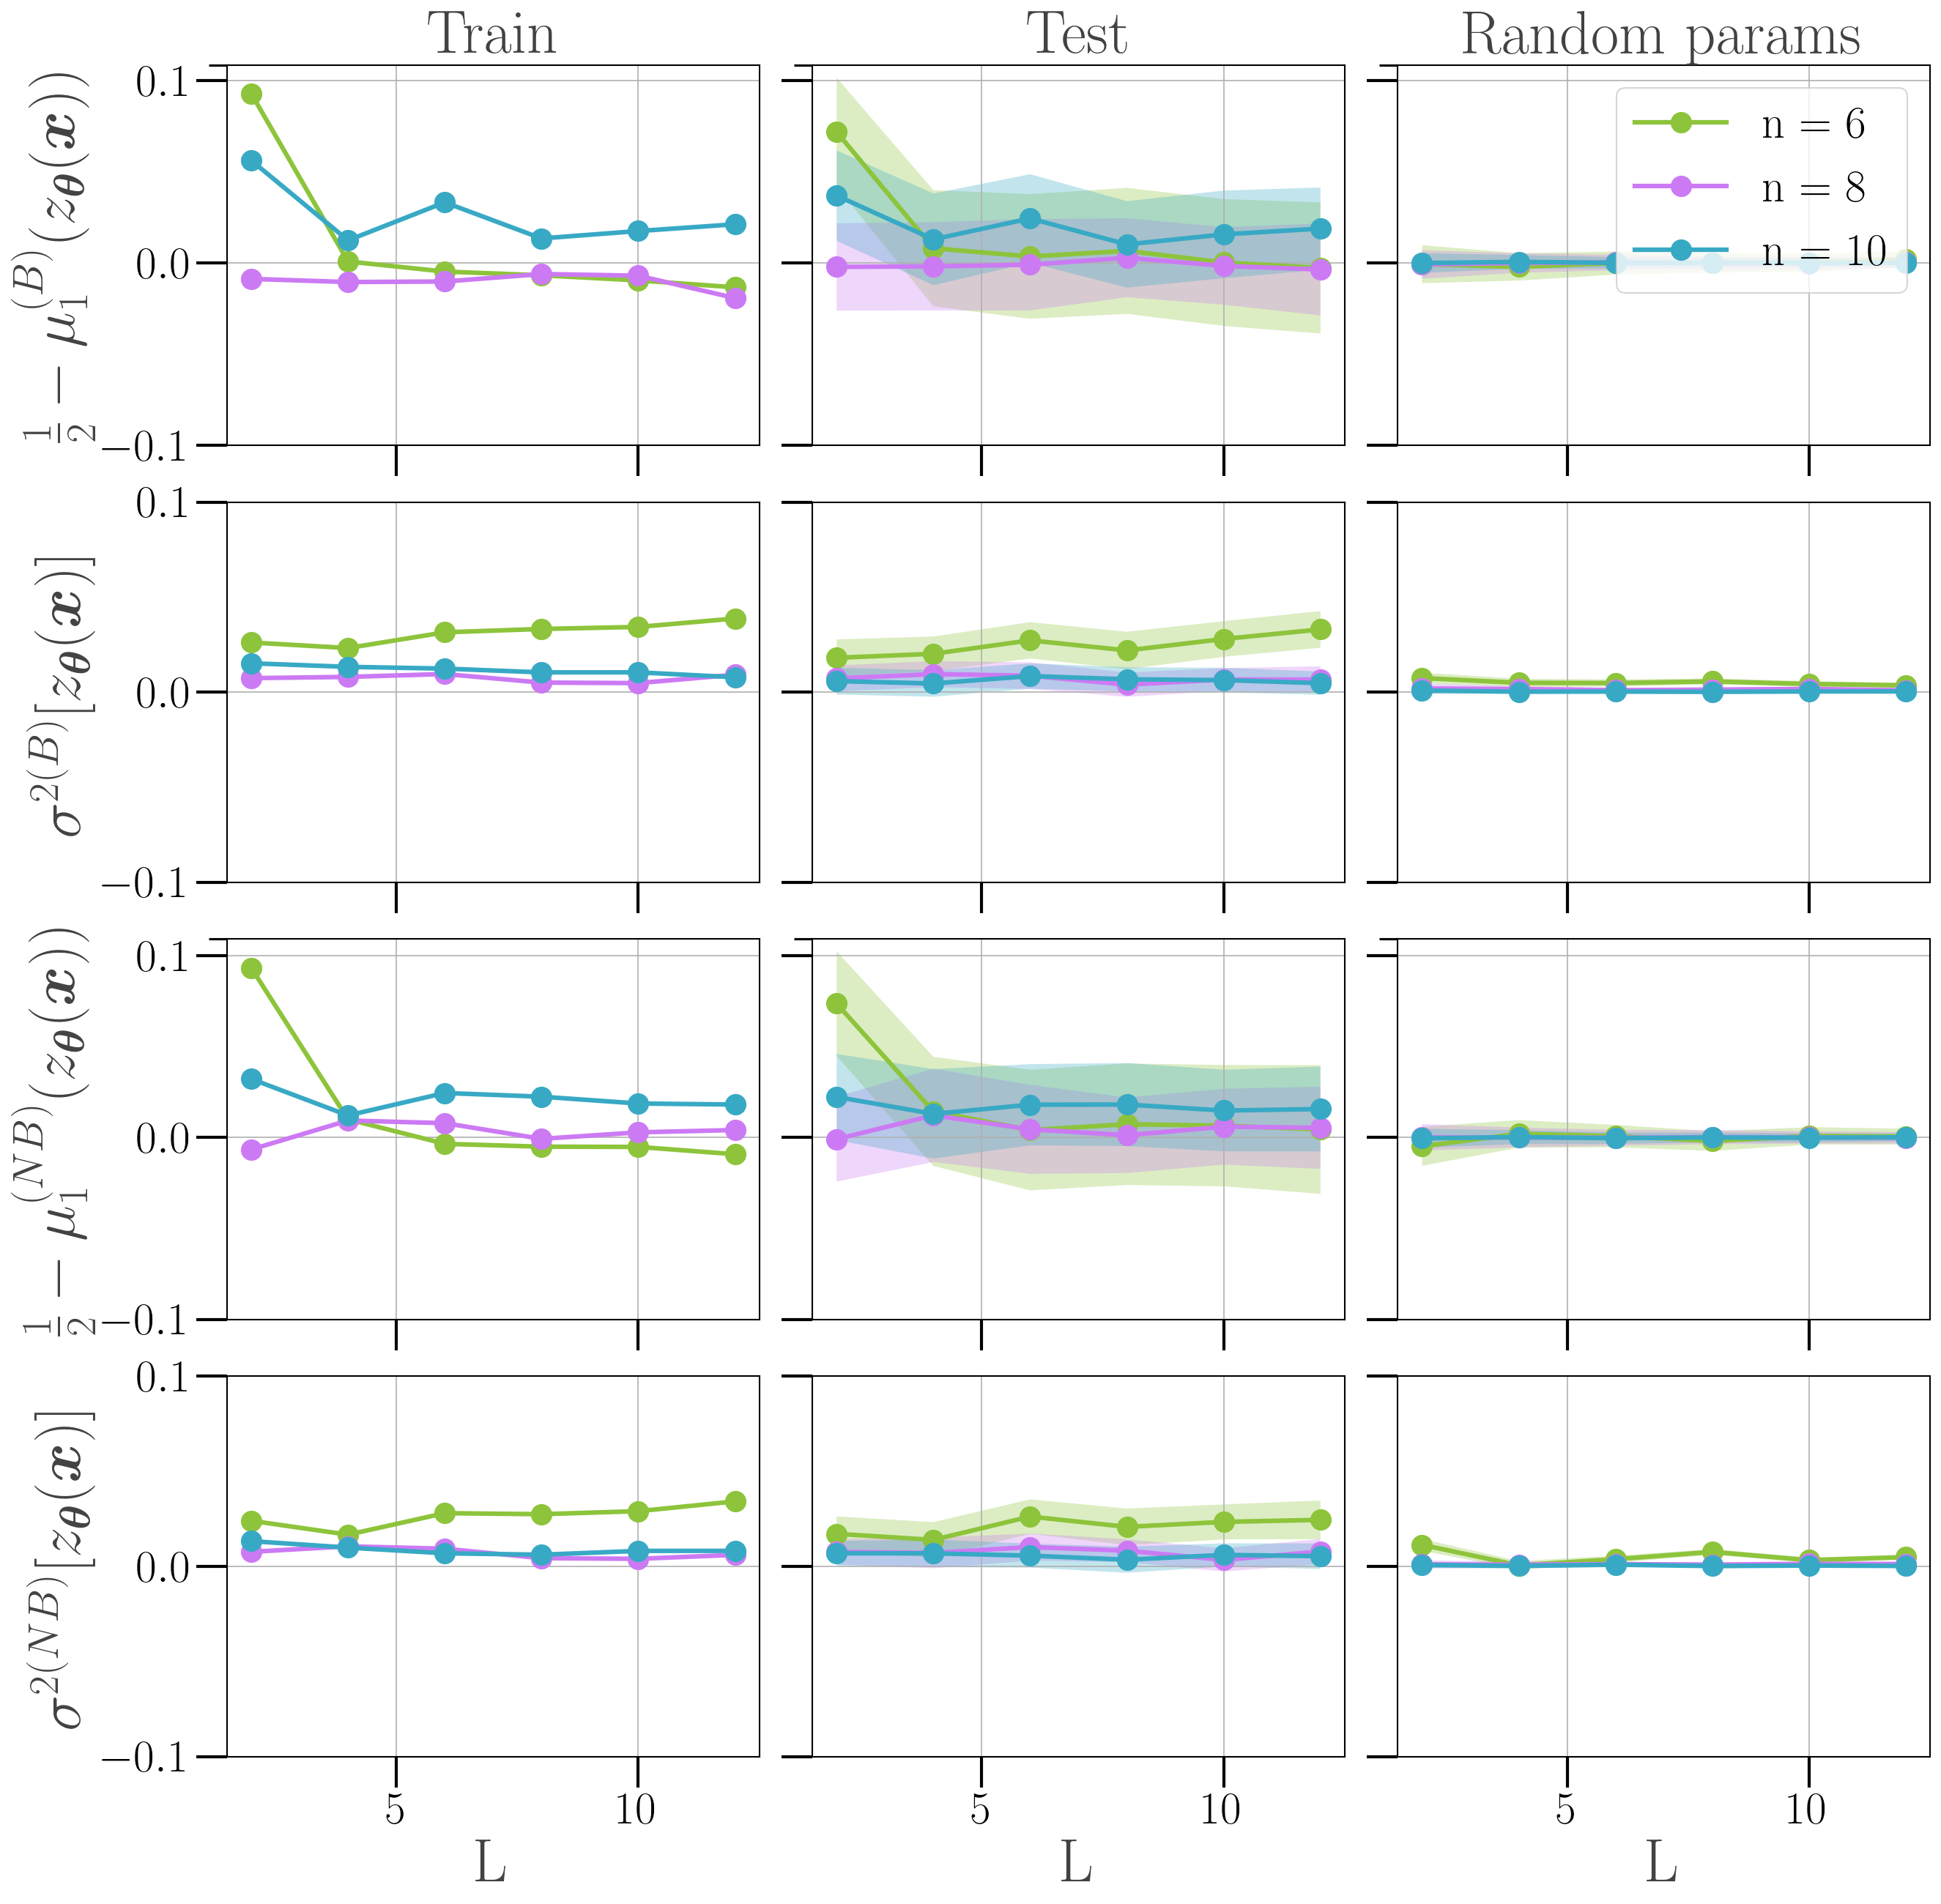

In [ ]:
# FM 
am = moment_analytic() 
import seaborn as sns
grey = '#424242'
clrs = sns.color_palette("husl", 3)
clrs = ['#8BA629','#829DD1', '#EBAE49', 'red']
rcParams['figure.figsize'] = (20,20)
prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']
cols = sns.color_palette("husl", 5)[2:]

# clrs = ['orange', cols[-1], cols[-2]]
clrss = sns.color_palette("husl", 5)
clrs =  ['#8DC43B',cols[-1],  cols[-2], clrss[0]]
fig, axs = plt.subplots(nrows =4, ncols =3 ,sharex='col', sharey='row')
ts = [1,2]
ns = [6,8,10]
layers = [2,4,6,8,10,12]
markersize = 10 
brick = ['brick', 0, 'non-brick', 0]
layers = [2,4,6,8,10,12]

for j,n in enumerate(ns):
    eigenvalues = [1, 0]
    multiplicities = [2**(n-1), 2**(n-1)]
    moment_Haar = {t: am.compute_moments(eigenvalues,multiplicities, t) for t in ts}
    for k in range(0,4,2):
        M_t_train, _, M_t_test, error_t_test,M_t_random,error_t_random = read_file_FM_new(n, [2,4,6,8,10,12], brick[k])
        M_t_train[1] = np.array(M_t_train[1])+moment_Haar[1]
        M_t_test[1] =  np.array(M_t_test[1])+ moment_Haar[1]
        M_t_random[1] = np.array(M_t_random[1])+ moment_Haar[1]

        Var_train = np.array(M_t_train[2])+moment_Haar[2]-np.array([i**2 for i in M_t_train[1]])
        Var_test = np.array(M_t_test[2])+moment_Haar[2]-np.array([i**2 for i in M_t_test[1]])
        E_test = np.array(error_t_test[2])- 2*np.array(M_t_test[1]) *np.array(error_t_test[1])
        Var_random =  np.array(M_t_random[2])+moment_Haar[2]-np.array([i**2 for i in M_t_random[1]])
        E_random = np.array(error_t_random[2])- 2*np.array(M_t_random[1])*np.array(error_t_random[1])


        axs[k+1][0].plot(layers, Var_train, marker='o', color = clrs[j], label = f'n = {n}', lw = 3, markersize = markersize)
        axs[k+1][1].plot(layers, Var_test, marker = 'o', color = clrs[j], label = f'n = {n}, Test', lw = 3, markersize = markersize)
        axs[k+1][1].fill_between(layers, Var_test- E_test,Var_test+E_test, alpha = 0.3, facecolor=clrs[j]) #, '*', ls= '--', color = c
        axs[k+1][2].plot(layers, Var_random, marker = 'o', color = clrs[j] ,label = f'n = {n}', lw = 3, markersize = markersize)
        axs[k+1][2].fill_between(layers, Var_random- E_random,Var_random+E_random, alpha = 0.3, facecolor=clrs[j] )
        

        axs[k][0].plot(layers, 1/2-(1- np.array(M_t_train[1])), marker='o', color = clrs[j], label = f'n = {n}', lw = 3, markersize = markersize)
        axs[k][1].plot(layers, 1/2-(1- np.array(M_t_test[1])), marker = 'o', color = clrs[j], lw = 3, markersize = markersize) #, label = f'Test n = {n}', lw = 3)
        axs[k][1].fill_between(layers, 1/2-(1- np.array(M_t_test[1])-  np.array(error_t_test[1])), 1/2-(1- np.array(M_t_test[1])+ np.array(error_t_test[1])), alpha = 0.3, facecolor=clrs[j] ) #, '*', ls= '--', color = clrs[j], label = f'Test. t = {t}', lw = 3)
        axs[k][2].plot(layers, 1/2-(1- np.array(M_t_random[1])), marker=  'o',  color = clrs[j], lw =3, markersize = markersize,  label = f'n = {n}'  )#,label = f'Random. n = {n}', lw = 3)
        axs[k][2].fill_between(layers, 1/2-(1- np.array(M_t_random[1])- np.array(error_t_random[1])),  1/2-(1- np.array(M_t_random[1])+ np.array(error_t_random[1])), alpha = 0.3, facecolor=clrs[j])
        
       
        for l in range(3):
            axs[k][l].grid()
            axs[k+1][l].grid()
            axs[k][l].set_yscale('symlog')
            axs[k+1][l].set_yscale('symlog')
            

handles, labels = axs[0][0].get_legend_handles_labels()

axs[0][2].legend()

fs = 40
axs[2][0].set_ylabel(r'$\frac 12- \mu_1^{(NB)} (z_{\boldsymbol{\theta}}(\boldsymbol{x})) $ ' , color = grey, fontsize = fs)
axs[3][0].set_ylabel(r'$\sigma^{2(NB)}[z_{\boldsymbol{\theta}}(\boldsymbol{x})]$ ' , color = grey, fontsize = fs)
axs[0][0].set_ylabel(r'$\frac 12- \mu_1^{(B)} (z_{\boldsymbol{\theta}}(\boldsymbol{x})) $ ' , color = grey, fontsize = fs)
axs[1][0].set_ylabel(r'$\sigma^{2(B)}[z_{\boldsymbol{\theta}}(\boldsymbol{x})]$ ' , color = grey, fontsize = fs)
axs[3][0].set_xlabel('L', color = grey, fontsize = fs )
axs[3][1].set_xlabel('L', color = grey, fontsize = fs )
axs[3][2].set_xlabel('L', color = grey, fontsize = fs )

axs[0][0].set_title('Train', color = grey, fontsize = fs )
axs[0][1].set_title('Test', color = grey, fontsize = fs )
axs[0][2].set_title('Random params', color = grey, fontsize = fs )
lim = 0.1
axs[0][0].set_yticks([-lim, 0, lim])
axs[1][0].set_yticks([-lim, 0, lim])
axs[2][0].set_yticks([-lim, 0, lim])
axs[3][0].set_yticks([-lim, 0, lim])
from matplotlib.ticker import ScalarFormatter
for i in range(4): 
    axs[i][0].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    axs[i][0].yaxis.get_major_formatter().set_scientific(False)
# axs[0][0].set_yticks([-0.1, 0, 0.3])
# axs[1][0].set_yticks([-0.1, 0, 0.3])
# axs[2][0].set_yticks([-0.1, 0, 0.3])
# axs[3][0].set_yticks([-0.1, 0, 0.3])
plt.subplots_adjust(wspace=0.1, hspace=0.15)
plt.savefig(f'figs/Var_mu1_FM.pdf', bbox_inches='tight')